<a href="https://colab.research.google.com/github/kalahasv/road-obstruction-project/blob/main/nano_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**READ ME**

Code for looking at test image bounding box adapted from: https://roboflow.com/model/rf-detr

---

YOLOv9 Documentation also referenced: https://docs.ultralytics.com/models/yolov9/


---
Contributions: Vikasni Kalahasthi


---

Running the Code: Simply run the whole notebook. You may have to reload the notebook for the imports to properly work. It will prompt you for this. You can change which yolo version you are running by changing the yaml. The alternative .yamls are in the yolov9t folder. The final alternatives are labeled as "altv1" and "altv2".



GPU is available


# Load Data from Roboflow

In [ ]:
!pip install --quiet roboflow

In [ ]:
import os
os.chdir('/content')

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="9OSMXZXbYjy6Pxxf0g3O")
project = rf.workspace("yolov7-dzzid").project("streetanomaly")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to streetanomaly-1 in yolov9:: 100%|██████████| 8350/8350 [00:03<00:00, 2363.99it/s]


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
image_path = "/content/streetanomaly-1/test/images/00000005_jpg.rf.220e7600492c4e94f961738efe3cea4e.jpg"
annotation_path = "/content/streetanomaly-1/test/labels/00000005_jpg.rf.220e7600492c4e94f961738efe3cea4e.txt"

In [ ]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
with open(annotation_path, 'r') as f:
    annotations = f.readlines()

    print(annotations)

['1 0.4757 0.5923666666666667 0.5125 0.4264']


In [ ]:
for annotation in annotations:
  data = annotation.strip().split(' ')
  class_id = int(data[0])
  x_center = float(data[1])
  y_center = float(data[2])
  width = float(data[3])
  height = float(data[4])

  img_height, img_width, _ = img.shape

  x_min = int((x_center - width / 2) * img_width)
  y_min = int((y_center - height / 2) * img_height)
  x_max = int((x_center + width / 2) * img_width)
  y_max = int((y_center + height / 2) * img_height)

  # Draw bounding box
  cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2) # Green bounding box


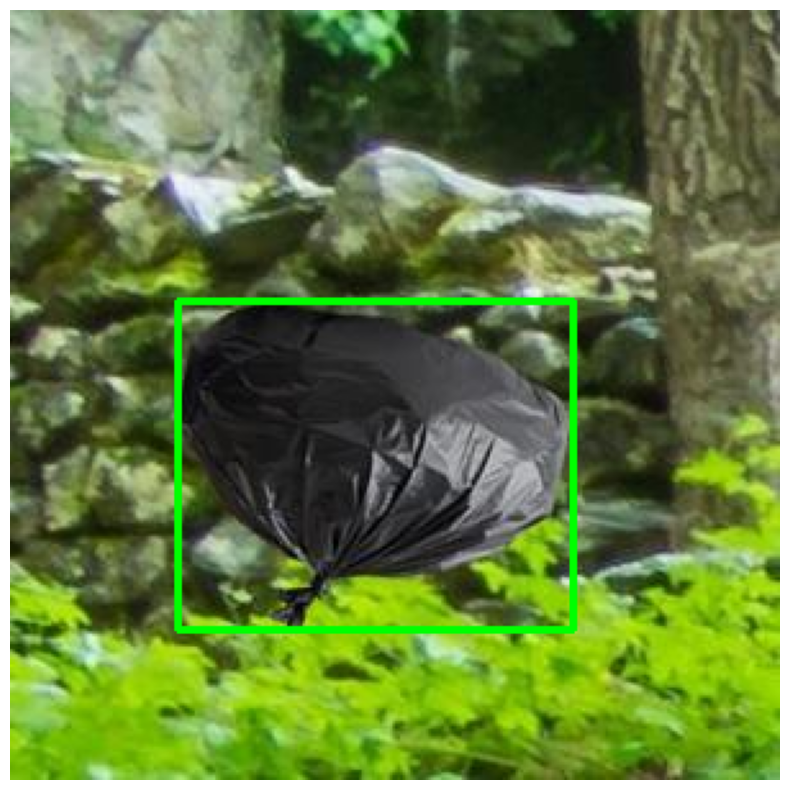

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


# Training:odel


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a pretrained YOLO11n model
#model = YOLO("yolo11n.pt")
model = YOLO('/content/drive/Shareddrives/258Project/yolov9t/altv1-yolov9t.yaml')  # Load custom model architecture

#alternate: load in pretrainined and then change it
model.info()

altv1-YOLOv9t summary: 544 layers, 3,927,270 parameters, 3,927,254 gradients, 15.2 GFLOPs


(544, 3927270, 3927254, 15.214591999999998)

In [ ]:
import torch.nn as nn
class CustomModel(nn.Module):
  def __init__(self, pretrained_model,): # add yaml path for custom model
    super(CustomModel, self).__init__()
    self.pretrained = pretrained_model
    self.new_layer = nn.Sequential(
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # Add Max Pooling layer
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), # Adjust output channels to 128
        nn.ReLU()
        )
    self.yaml = yaml_path # store yaml path

  def forward(self, x):
    x = self.pretrained(x)
    x = self.new_layer(x)
    return x

In [ ]:
# Iterate through all modules in your model
for i, layer in enumerate(model.model.modules()):
    print(f"Layer {i}: {layer}")
    print(f"  Input Shape: {layer.in_channels if hasattr(layer, 'in_channels') else 'N/A'}") # Print input channels if available
    print(f"  Output Shape: {layer.out_channels if hasattr(layer, 'out_channels') else 'N/A'}") # Print output channels if available
    # Print other relevant information as needed
    print("-" * 30)  # Add a separator for readability

Layer 0: DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(24, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): ELAN1(
      (cv1): Conv(
        (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(24, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU

In [ ]:
!nvidia-smi

Wed May 21 11:28:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
print(torch.cuda.is_available()) # Should print True if CUDA is working
print(torch.cuda.device_count()) # Should print the number of available GPUs
#print(torch.cuda.get_device_name(0))

True
1


In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('GPU is not available')

model.to(device)

GPU is available


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(24, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): ELAN1(
        (cv1): Conv(
          (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(24, eps=0.001, momentum=0.03, affine=Tru

In [ ]:
# Train the model on the COCO8 dataset for 100 epochs
%%time
train_results = model.train(
    data="/content/streetanomaly-1/data.yaml",  # Path to dataset configuration file
    epochs=5,  # Number of training epochs
    imgsz=640,  # Image size for training
    device=device  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
)

engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/streetanomaly-1/data.yaml, degrees=0.0, deterministic=True, device=cuda, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/Shareddrives/258Project/yolov9t/yolov9t.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, projec

train: Scanning /content/streetanomaly-1/train/labels.cache... 3762 images, 16 backgrounds, 0 corrupt: 100%|██████████| 3762/3762 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2529, len(boxes) = 8322. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 365.7±157.9 MB/s, size: 68.6 KB)


val: Scanning /content/streetanomaly-1/valid/labels.cache... 252 images, 0 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 56, len(boxes) = 602. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 261 weight(decay=0.0), 268 weight(decay=0.0005), 267 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.71G      3.448      4.634      4.026          2        640: 100%|██████████| 236/236 [01:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        252        602    0.00266      0.253    0.00226   0.000788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.88G      3.018      4.135      3.406         10        640: 100%|██████████| 236/236 [01:35<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        252        602      0.069     0.0451     0.0151    0.00365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.88G      2.653      3.802      3.032          8        640: 100%|██████████| 236/236 [01:32<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        252        602     0.0678     0.0838      0.019    0.00642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.88G      2.466      3.461      2.835         10        640: 100%|██████████| 236/236 [01:33<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        252        602      0.294      0.132      0.117     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.88G      2.322      3.193      2.705          7        640: 100%|██████████| 236/236 [01:33<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        252        602      0.376      0.188      0.193     0.0794



5 epochs completed in 0.138 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9t summary (fused): 230 layers, 2,459,538 parameters, 0 gradients, 9.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


                   all        252        602      0.378      0.188      0.193     0.0792
               garbage         77        193      0.426      0.326      0.322       0.11
              graffiti        147        353      0.477     0.0935      0.123     0.0465
               pothole         28         56       0.23      0.143      0.132     0.0807
Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/train3
CPU times: user 6min 43s, sys: 12.2 s, total: 6min 55s
Wall time: 8min 32s


### Export

In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 75.1 MB/s eta 0:00:00


In [ ]:
model_export = model
model_export.eval()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): ELAN1(
        (cv1): Conv(
          (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv4): Conv(
          (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (3): AConv(
        (cv1): Conv(
          (conv): Conv2d

In [ ]:
train_on_gpu = torch.cuda.is_available()
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [ ]:
x = torch.randn(1, 1, 640, 640, requires_grad=True, device=device)
torch.onnx.export(model_export,                                 # model being run
                  x,                                           # model input (or a tuple for multiple inputs)
                  "yolov9t.onnx",                            # where to save the model (can be a file or file-like object)
                  export_params=True,                          # store the trained parameter weights inside the model file
                  opset_version=10,                            # the ONNX version to export the model to
                  do_constant_folding=True,                    # whether to execute constant folding for optimization
                  input_names = ['input'],                     # the model's input names
                  output_names = ['output'],                   # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},  # variable length axes
                                'output': {0 : 'batch_size'}})

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/streetanomaly-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/Shareddrives/258Project/Alt1_Yolo9t_10/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

RuntimeError: Dataset '/content/streetanomaly-2/data.yaml' error ❌ '/content/streetanomaly-2/data.yaml' does not exist

In [ ]:
import onnx
onnx_model= onnx.load("yolov9t.onnx")
onnx.checker.check_model(onnx_model)

# Testing

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9t summary (fused): 230 layers, 2,459,538 parameters, 0 gradients, 9.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1177.0±476.0 MB/s, size: 57.6 KB)


val: Scanning /content/streetanomaly-1/valid/labels.cache... 252 images, 0 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 56, len(boxes) = 602. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]


                   all        252        602      0.373      0.191      0.194     0.0795
               garbage         77        193      0.417      0.338      0.324       0.11
              graffiti        147        353      0.472     0.0935      0.124      0.047
               pothole         28         56      0.231      0.143      0.133      0.081
Speed: 1.8ms preprocess, 6.7ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train32

image 1/1 /content/streetanomaly-1/test/images/00000005_jpg.rf.220e7600492c4e94f961738efe3cea4e.jpg: 640x640 (no detections), 18.0ms
Speed: 2.7ms preprocess, 18.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


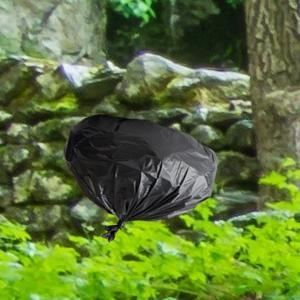

In [ ]:
# Evaluate the model's performance on the validation set
metrics = model.val()

img_path = "/content/streetanomaly-1/test/images/00000005_jpg.rf.220e7600492c4e94f961738efe3cea4e.jpg"

# Perform object detection on an image
results = model.predict(img_path) # Predict on an image
results[0].show()  # Display results